Exec 1.c

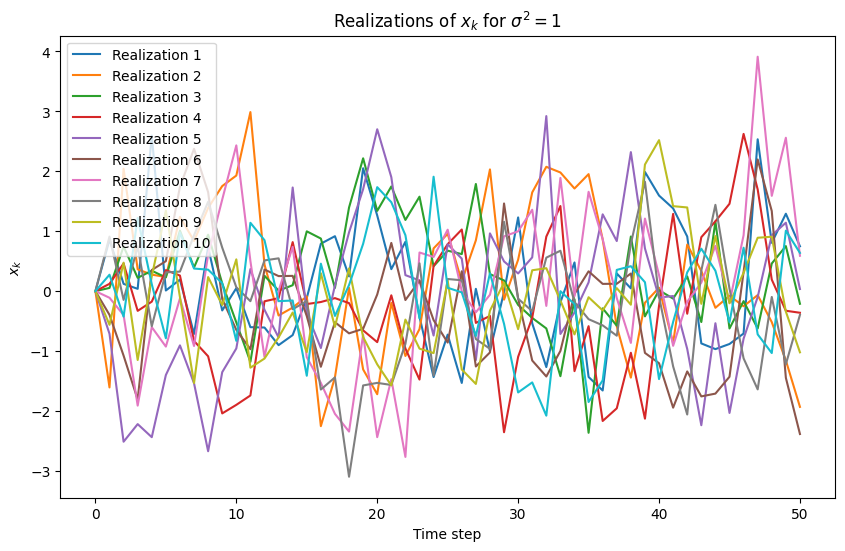

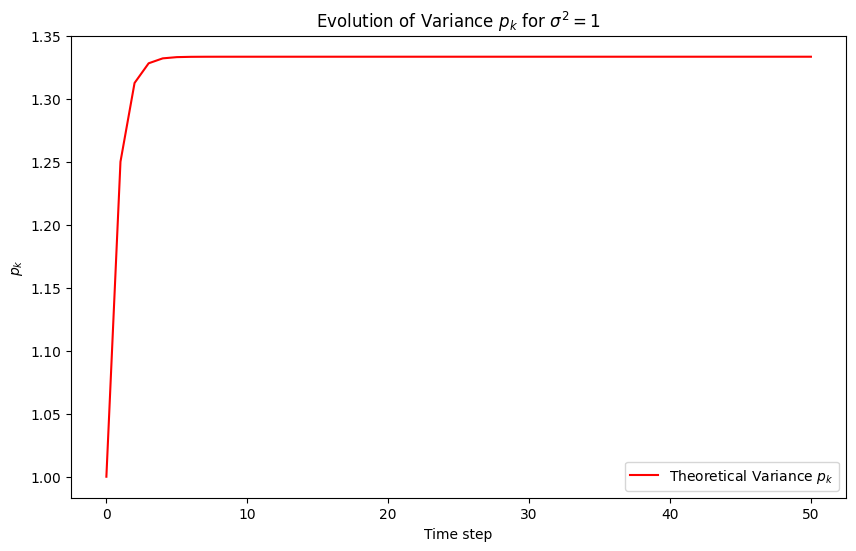

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma2 = 1
num_steps = 50
num_realizations = 1000
x0 = 0
p0 = sigma2

# Generate realizations of x_k and theoretical variance evolution of p_k
realizations = []
for _ in range(num_realizations):
    x = [x0]
    for k in range(num_steps):
        wk = np.random.normal(0, np.sqrt(sigma2))
        x.append(0.5 * x[-1] + wk)
    realizations.append(x)

# Calculate the evolution of p_k (variance) over time
p_values = [p0]
for k in range(num_steps):
    p_values.append(0.25 * p_values[-1] + sigma2)

# Plot a subset of realizations for x_k
plt.figure(figsize=(10, 6))
for i in range(10):  # Plot only 10 realizations for clarity
    plt.plot(realizations[i], label=f'Realization {i+1}')
plt.xlabel("Time step")
plt.ylabel("$x_k$")
plt.title("Realizations of $x_k$ for $\sigma^2 = 1$")
plt.legend()
plt.show()

# Plot the variance evolution p_k over time
plt.figure(figsize=(10, 6))
plt.plot(p_values, color="red", label="Theoretical Variance $p_k$")
plt.xlabel("Time step")
plt.ylabel("$p_k$")
plt.title("Evolution of Variance $p_k$ for $\sigma^2 = 1$")
plt.legend()
plt.show()

Exec 2.e

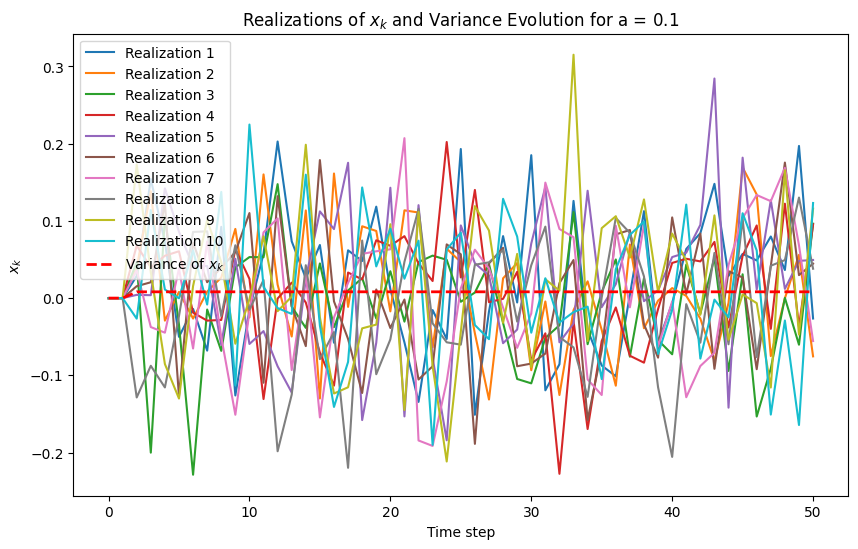

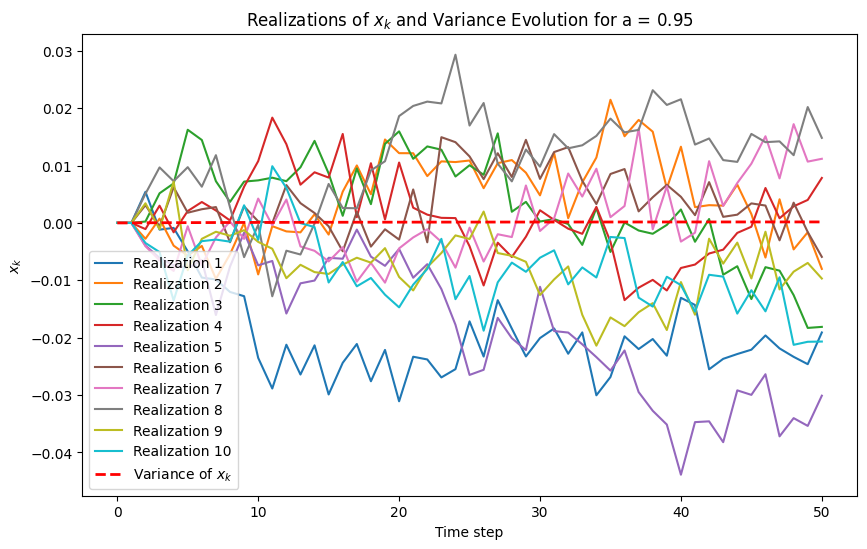

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a_values = [0.1, 0.95]  # Two different values for `a` as given in the problem
sigma2 = 0.01  # Variance of the white noise
num_steps = 50  # Number of time steps
num_realizations = 100  # Number of realizations for the process

# Define the system and noise matrices
for a in a_values:
    # System matrices
    A = np.array([[0, 1], [a/2, a/2]])
    F = np.array([[0], [1 - a]])

    # Initialize covariance matrix for the process
    P = np.zeros((2, 2))  # Start with P_0 as a zero matrix
    P_values = [P.copy()]  # To store the covariance matrix at each time step

    # Generate realizations of x_k for multiple runs
    realizations_xk = []
    for _ in range(num_realizations):
        X = np.array([0, 0])  # Initial state [x_0, x_1] = [0, 0]
        xk_values = [X[0]]  # Store the first component (x_k) over time
        for k in range(num_steps):
            # Generate noise wk
            wk = np.random.normal(0, np.sqrt(sigma2))
            # Update state based on process model
            X = A @ X + F.flatten() * wk
            xk_values.append(X[0])
        realizations_xk.append(xk_values)

    # Calculate the evolution of covariance P_k over time
    for k in range(num_steps):
        # Compute next covariance based on the recursive formula
        P = A @ P @ A.T + F @ F.T * sigma2
        P_values.append(P.copy())  # Store the updated covariance matrix

    # Extract the variances (diagonal elements) for plotting
    var_xk = [P[0, 0] for P in P_values]  # Variance of x_k over time

    # Plot realizations of x_k for the current value of a
    plt.figure(figsize=(10, 6))
    for i in range(10):  # Show only 10 realizations for clarity
        plt.plot(realizations_xk[i], label=f'Realization {i+1}')
    plt.plot(var_xk, 'r--', linewidth=2, label="Variance of $x_k$")  # Plot variance as a dashed red line
    plt.xlabel("Time step")
    plt.ylabel("$x_k$")
    plt.title(f"Realizations of $x_k$ and Variance Evolution for a = {a}")
    plt.legend()
    plt.show()

  Exec3.a

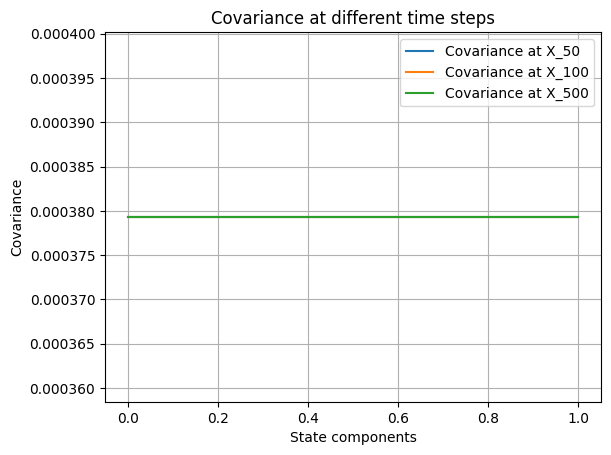

Covariance at X50:
[[0.00037931 0.00031034]
 [0.00031034 0.00037931]]
Covariance at X100:
[[0.00037931 0.00031034]
 [0.00031034 0.00037931]]
Covariance at X500:
[[0.00037931 0.00031034]
 [0.00031034 0.00037931]]


In [ ]:
import numpy as np
from scipy.linalg import solve_discrete_lyapunov
import matplotlib.pyplot as plt

# Parameters
a = 0.9
sigma2 = 0.01
num_steps = 500  # For large number of steps

# System matrices
A = np.array([[0, 1], [a / 2, a / 2]])
F = np.array([[0], [1 - a]])

# Compute F * F^T * sigma2
Q = F @ F.T * sigma2

# Solve the discrete Lyapunov equation to find the steady state covariance
P_steady = solve_discrete_lyapunov(A, Q)

# Initialize list to store covariance matrices at different time steps
P_50 = P_steady.copy()
P_100 = P_steady.copy()
P_500 = P_steady.copy()

# Compute the covariance at time step 50, 100, and 500
for k in range(num_steps):
    P_50 = A @ P_50 @ A.T + Q
    if k == 99:
        P_100 = P_50.copy()
    if k == 499:
        P_500 = P_50.copy()

# Plot the covariance evolution
time_steps = [50, 100, 500]
covariances = [P_50, P_100, P_500]

for i, P_k in zip(time_steps, covariances):
    plt.plot([0, 1], [P_k[0, 0], P_k[1, 1]], label=f'Covariance at X_{i}')
plt.xlabel('State components')
plt.ylabel('Covariance')
plt.legend()
plt.title('Covariance at different time steps')
plt.grid(True)
plt.show()

# Print the covariance matrices for X_50, X_100, X_500
print(f"Covariance at X50:\n{P_50}")
print(f"Covariance at X100:\n{P_100}")
print(f"Covariance at X500:\n{P_500}")

Exec3.b

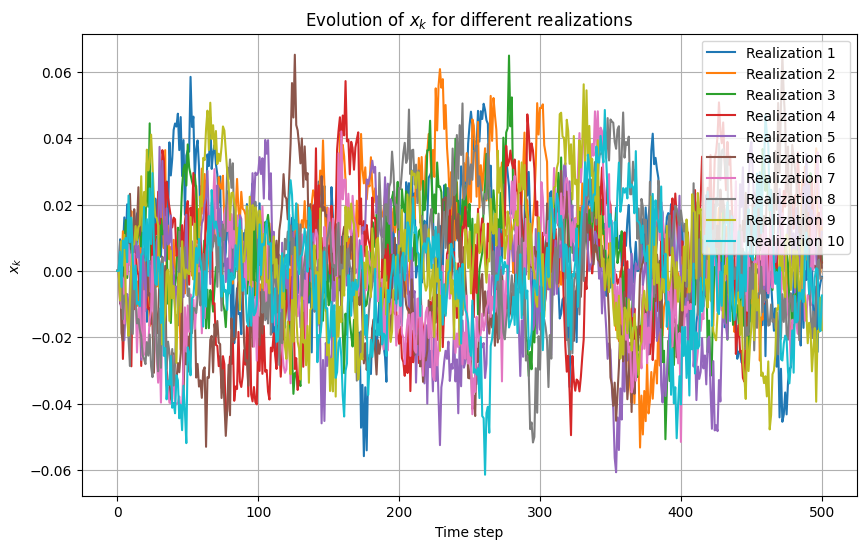

In [ ]:
# Parameters for Monte Carlo simulation
num_realizations = 100  # Number of Monte Carlo realizations
num_steps = 500  # Number of time steps

# Store the realizations
realizations = []

for run in range(num_realizations):
    X = np.array([0, 0])  # Initial state [x_0, x_1] = [0, 0]
    states = [X]
    for k in range(num_steps):
        # Generate noise wk
        wk =  np.random.normal(0, np.sqrt(sigma2))
        # Update state based on process model
        X = A @ X + F.flatten() * wk
        states.append(X)
    realizations.append(states)

# Plot a few realizations of the state evolution
plt.figure(figsize=(10, 6))
for i in range(10):  # Show only 10 realizations for clarity
    plt.plot([state[0] for state in realizations[i]], label=f'Realization {i+1}')
plt.xlabel("Time step")
plt.ylabel("$x_k$")
plt.title("Evolution of $x_k$ for different realizations")
plt.legend()
plt.grid(True)
plt.show()

Exec3.c

In [ ]:
# Function to estimate covariance from realizations at a given time step
def estimate_covariance(realizations, time_step):
    states_at_time = np.array([realization[time_step] for realization in realizations])
    return np.cov(states_at_time.T)

# Perform simulations for different numbers of runs
num_runs_list = [10, 50, 100]
covariances_by_runs = {}

for num_runs in num_runs_list:
    realizations = []

    for run in range(num_runs):
        X = np.array([0, 0])  # Initial state [x_0, x_1] = [0, 0]
        states = [X]
        for k in range(num_steps):
            # Generate noise wk
            wk = np.random.normal(0, np.sqrt(sigma2))
            # Update state based on process model
            X = A @ X + F.flatten() * wk
            states.append(X)
        realizations.append(states)

    # Estimate covariance matrices for X_50, X_100, X_500
    cov_X50 = estimate_covariance(realizations, 50)
    cov_X100 = estimate_covariance(realizations, 100)
    cov_X500 = estimate_covariance(realizations, 500)

    # Store the results for each number of runs
    covariances_by_runs[num_runs] = {
        "Covariance at X50": cov_X50,
        "Covariance at X100": cov_X100,
        "Covariance at X500": cov_X500
    }

# Print the covariance matrices for different numbers of runs
for num_runs in num_runs_list:
    print(f"Covariances for {num_runs} runs:")
    print(f"Covariance at X50:\n{covariances_by_runs[num_runs]['Covariance at X50']}")
    print(f"Covariance at X100:\n{covariances_by_runs[num_runs]['Covariance at X100']}")
    print(f"Covariance at X500:\n{covariances_by_runs[num_runs]['Covariance at X500']}")
    print("----------")

Covariances for 10 runs:
Covariance at X50:
[[0.00026159 0.00023464]
 [0.00023464 0.00044389]]
Covariance at X100:
[[0.00039697 0.00042383]
 [0.00042383 0.00059139]]
Covariance at X500:
[[0.00045604 0.00046089]
 [0.00046089 0.00064311]]
----------
Covariances for 50 runs:
Covariance at X50:
[[0.00036842 0.00030181]
 [0.00030181 0.00033341]]
Covariance at X100:
[[0.00042899 0.00038999]
 [0.00038999 0.00050981]]
Covariance at X500:
[[0.00029095 0.00021699]
 [0.00021699 0.00026637]]
----------
Covariances for 100 runs:
Covariance at X50:
[[0.0004151  0.00030692]
 [0.00030692 0.00037855]]
Covariance at X100:
[[0.00050055 0.00040777]
 [0.00040777 0.00042821]]
Covariance at X500:
[[0.00042712 0.000403  ]
 [0.000403   0.00051321]]
----------


Exec4c.iii


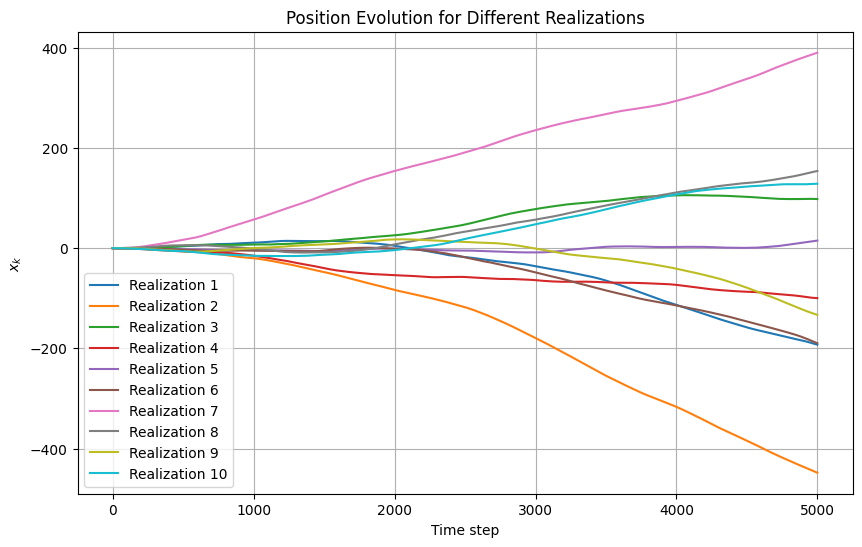

Estimated mean of x_100: -0.010106593424706451
Estimated covariance of x_100: 0.323972011017682


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 0.1  # Sampling period
a_k = 0  # Acceleration (constant in this case)
sigma2_a = 0.01  # Variance of the noise in acceleration
num_steps = 5000  # Time steps (we are interested in x_100)
num_realizations = 100  # Number of Monte Carlo realizations

# State-space model matrices
A = np.array([[1, T], [0, 1]])
B = np.array([[0.5*T**2], [T]])

# Monte Carlo simulation
realizations = []
for _ in range(num_realizations):
    # Initialize state
    x = np.array([0, 0])  # [x_0, v_0] = [0, 0] (initial position and velocity)
    states = [x]
    for k in range(num_steps):
        # Generate random noise in acceleration (Gaussian noise)
        w_k = np.random.normal(0, np.sqrt(sigma2_a))  # Noise4 term
        a_k_noisy = a_k + w_k  # Corrupted acceleration
        # Update state based on the model
        x = A @ x + B.flatten() * a_k_noisy
        states.append(x)
    realizations.append(states)

# Compute the covariance of x_100
x_100_values = [realization[100][0] for realization in realizations]  # x_100 is the position at step 100
mean_x_100 = np.mean(x_100_values)
cov_x_100 = np.var(x_100_values)

# Plot the first 10 realizations of the position
plt.figure(figsize=(10, 6))
for i in range(10):  # Show only the first 10 realizations for clarity
    plt.plot([state[0] for state in realizations[i]], label=f'Realization {i+1}')
plt.xlabel("Time step")
plt.ylabel("$x_k$")
plt.title("Position Evolution for Different Realizations")
plt.legend()
plt.grid(True)
plt.show()

# Output the results
print(f"Estimated mean of x_100: {mean_x_100}")
print(f"Estimated covariance of x_100: {cov_x_100}")